In [4]:
!pip install osmnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.0 MB/s eta 0:00:00


In [2]:
import osmnx as ox

G = ox.graph_from_place("Kraków, Polska", network_type="bike")
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)


print(edges.columns)
inż opr testy_
[4]
8 s

Collecting osmnx
  Downloading osmnx-2.0.6-py3-none-any.whl.metadata (4.9 kB)
Requirement already satisfied: geopandas>=1.0.1 in /usr/local/lib/python3.12/dist-packages (from osmnx) (1.1.1)
Requirement already satisfied: networkx>=2.5 in /usr/local/lib/python3.12/dist-packages (from osmnx) (3.5)
Requirement already satisfied: numpy>=1.22 in /usr/local/lib/python3.12/dist-packages (from osmnx) (2.0.2)
Requirement already satisfied: pandas>=1.4 in /usr/local/lib/python3.12/dist-packages (from osmnx) (2.2.2)
Requirement already satisfied: requests>=2.27 in /usr/local/lib/python3.12/dist-packages (from osmnx) (2.32.4)
Requirement already satisfied: shapely>=2.0 in /usr/local/lib/python3.12/dist-packages (from osmnx) (2.1.2)
Requirement already satisfied: pyogrio>=0.7.2 in /usr/local/lib/python3.12/dist-packages (from geopandas>=1.0.1->osmnx) (0.11.1)
Requirement already satisfied: packaging in /usr/local/lib/python3.12/dist-packages (from geopandas>=1.0.1->osmnx) (25.0)
Requirement already satisfied: pyproj>=3.5.0 in /usr/local/lib/python3.12/dist-packages (from geopandas>=1.0.1->osmnx) (3.7.2)
Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.12/dist-packages (from pandas>=1.4->osmnx) (2.9.0.post0)
Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.12/dist-packages (from pandas>=1.4->osmnx) (2025.2)
Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.12/dist-packages (from pandas>=1.4->osmnx) (2025.2)
Requirement already satisfied: charset_normalizer<4,>=2 in /usr/local/lib/python3.12/dist-packages (from requests>=2.27->osmnx) (3.4.4)
Requirement already satisfied: idna<4,>=2.5 in /usr/local/lib/python3.12/dist-packages (from requests>=2.27->osmnx) (3.11)
Requirement already satisfied: urllib3<3,>=1.21.1 in /usr/local/lib/python3.12/dist-packages (from requests>=2.27->osmnx) (2.5.0)
Requirement already satisfied: certifi>=2017.4.17 in /usr/local/lib/python3.12/dist-packages (from requests>=2.27->osmnx) (2025.10.5)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.12/dist-packages (from python-dateutil>=2.8.2->pandas>=1.4->osmnx) (1.17.0)
Downloading osmnx-2.0.6-py3-none-any.whl (101 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.0 MB/s eta 0:00:00
Installing collected packages: osmnx
Successfully installed osmnx-2.0.6

[ ]

Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'ref',
       'reversed', 'length', 'geometry', 'width', 'tunnel', 'junction',
       'service', 'bridge', 'access', 'est_width', 'area'],
      dtype='object')


Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'ref',
       'reversed', 'length', 'geometry', 'width', 'tunnel', 'junction',
       'service', 'bridge', 'access', 'est_width', 'area'],
      dtype='object')


In [3]:
import osmnx as ox
import folium

#pobranie sieci dróg
G = ox.graph_from_place("Kraków, Polska", network_type="bike")
#konwert na geodataframe
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)
#wybranie przykłądowej części sieci
sample = edges.sample(100)
#utworzenie mapy
m = folium.Map(location=[50.06, 19.94], zoom_start=13)
#dodanie dróg
for _, row in sample.iterrows():
    coords = [(y, x) for x, y in row["geometry"].coords]
    folium.PolyLine(coords, color="blue", weight=2).add_to(m)

m


In [ ]:
import osmnx as ox

G = ox.graph_from_place("Amsterdam, Netherlands", network_type="bike")
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

#wypisanie dostępnych atrybutów
print(edges.columns)

#filtrowanie po drogach rowerowych
cycleways = edges[edges["highway"] == "cycleway"]
print("Ilość dróg rowerowych:", len(cycleways))


Index(['osmid', 'highway', 'name', 'oneway', 'width', 'reversed', 'length',
       'geometry', 'maxspeed', 'bridge', 'service', 'lanes', 'ref', 'access',
       'tunnel', 'junction', 'est_width', 'area'],
      dtype='object')
Ilość dróg rowerowych: 15834


[13822575, 32063262, 965424638, 966735212, 29782997, 32063274, 32063411, 32063406, 966555001, 1724543368, 1724543128, 1724543096, 12516368098, 8281748693, 967038014, 8281748694, 1842581768, 282666541, 12493085202, 12493053871, 4056142367, 206371161, 206371157, 207480364, 10749624822, 323813598, 1709251929, 323810552, 964568268, 2964325561, 324709943, 494661274, 494661280, 964080940, 207476155, 207476145, 964080765, 317034340, 2588092132, 2588092131, 944019002, 5818922038, 1506976416, 8926593999, 2588083526, 969097707, 317042123, 2588083524, 207476247, 1704926060, 207476244, 960204685, 282189458, 10886683683, 1505690479, 1505690441, 1505690411, 1505690402, 5789144485, 1505690174, 1505690165, 7187425612, 207476199, 798566479, 798566579, 243781986, 207476192, 4895259615, 281719609, 798569219, 207476176, 1664172150, 207476171, 3723590004, 3863115382, 3723589993, 3863115380, 3723589989, 3723589973, 9051982165, 3723589967, 3863115374, 1747228827, 1747228816, 206373658, 595413013, 1432955876,

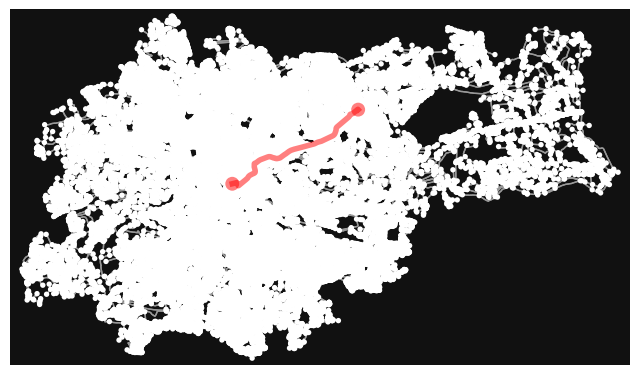

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
import osmnx as ox

G = ox.graph_from_place("Kraków, Polska", network_type="bike")

orig = list(G.nodes())[0]
dest = list(G.nodes())[100]

path = ox.routing.shortest_path(G, orig, dest, weight="length")
print(path)

ox.plot_graph_route(G, path)


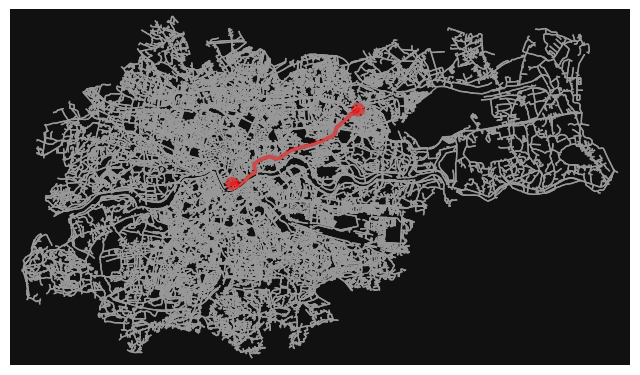

In [7]:
import osmnx as ox
fig, ax = ox.plot_graph_route(G, path, route_linewidth=3, node_size=0)


In [8]:
import osmnx as ox
import json

G = ox.graph_from_place("Kraków, Polska", network_type="bike")
orig, dest = list(G.nodes())[0], list(G.nodes())[100]
path = ox.shortest_path(G, orig, dest, weight="length")

# konwersja trasy na współrzędne
nodes, edges = ox.graph_to_gdfs(G)
route_coords = [(nodes.loc[node].y, nodes.loc[node].x) for node in path]

with open("route.geojson", "w") as f:
    json.dump({
        "type": "FeatureCollection",
        "features": [{
            "type": "Feature",
            "geometry": {
                "type": "LineString",
                "coordinates": [(lon, lat) for lat, lon in route_coords]
            },
            "properties": {"length_m": 1234}
        }]
    }, f)


In [10]:
import osmnx as ox
import pandas as pd

G = ox.graph_from_place("Kraków, Polska", network_type="bike")
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# Sprawdź przykładowy rekord i wypisz jego wszystkie atrybuty
sample_edge = edges.iloc[0]
print(sample_edge)


osmid                                                 25042019
highway                                              secondary
lanes                                                        2
maxspeed                                                    50
name                                              Kocmyrzowska
oneway                                                    True
ref                                                        776
reversed                                                 False
length                                               18.886163
geometry     LINESTRING (20.0325687 50.0820515, 20.032767 5...
width                                                      NaN
tunnel                                                     NaN
junction                                                   NaN
service                                                    NaN
bridge                                                     NaN
access                                                 

In [11]:
import osmnx as ox     #puszukiwanie surface - jest 0 surface
import pandas as pd

G = ox.graph_from_place("Kraków, Polska", network_type="bike")
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

def extract_surface(row):
    if isinstance(row, dict) and "surface" in row:
        return row["surface"]
    if hasattr(row, "get") and "surface" in row:
        return row.get("surface")
    return None

# Przeskanuj kolumny i poszukaj 'surface'
if "tags" in edges.columns:
    edges["surface_extracted"] = edges["tags"].apply(extract_surface)
elif "other_tags" in edges.columns:
    edges["surface_extracted"] = edges["other_tags"].apply(extract_surface)
else:
    edges["surface_extracted"] = None

print(edges["surface_extracted"].value_counts(dropna=False))


surface_extracted
None    146235
Name: count, dtype: int64


In [14]:
import osmnx as ox        #puszukiwanie surface w Berlinie - też jest 0
import folium

# 1️⃣ Pobierz sieć dróg rowerowych + dodatkowy tag "surface"
custom_filter = (
    '["highway"]["bicycle"!~"no"]["access"!~"private"]'
    '["surface"]'
)
G = ox.graph_from_place("Berlin, Germany", custom_filter=custom_filter)

# 2️⃣ Zamiana grafu na GeoDataFrame
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

print("Dostępne kolumny:\n", edges.columns)
print("\nWystępujące typy nawierzchni:")
print(edges["surface"].value_counts(dropna=False))

# 3️⃣ Stworzenie mapy
m = folium.Map(location=[52.52, 13.405], zoom_start=12, tiles="cartodb positron")

# 4️⃣ Kolory dla typów nawierzchni
colors = {
    "asphalt": "blue",
    "paved": "green",
    "unpaved": "orange",
    "gravel": "gray",
    "ground": "brown",
    "dirt": "darkred",
    "cobblestone": "purple",
    "concrete": "black",
}

# 5️⃣ Dodanie linii do mapy
for _, row in edges.iterrows():
    surface = row.get("surface", "unknown")
    color = colors.get(surface, "lightgray")
    coords = [(y, x) for x, y in row["geometry"].coords]
    folium.PolyLine(coords, color=color, weight=2).add_to(m)

# 6️⃣ Zapisz mapę
m.save("berlin_surface_map.html")
print("✅ Mapa zapisana jako 'berlin_surface_map.html'")


Dostępne kolumny:
 Index(['osmid', 'highway', 'lanes', 'maxspeed', 'name', 'oneway', 'reversed',
       'length', 'width', 'geometry', 'service', 'ref', 'bridge', 'junction',
       'access', 'tunnel', 'area', 'est_width', 'landuse'],
      dtype='object')

Występujące typy nawierzchni:


KeyError: 'surface'